# Python技术类大作业

In [1]:
import csv
import os
import pandas as pd
from scipy import stats
import re
import matplotlib.pyplot as plt
import json
from  scipy.stats import chi2_contingency
import networkx as nx
from tld import get_tld

##  第一题

In [2]:
data1 = pd.read_csv("data/m-a_edges.csv", delimiter="\t")
data1

,source,target
0,Mashup: CouponRoots,/api/coupon
1,Mashup: Raise the Money,/api/nationbuilder
2,Mashup: AnythingToHTML,/api/hpe-haven-ondemand-view-document
3,Mashup: Velocipedia,/api/mapbox
4,Mashup: Api Expert - MyMemory Language Translator,/api/mymemory
...,...,...
12609,Mashup: Libraries411,/api/geocoder
12610,Mashup: Libraries411,/api/geocoderca
12611,Mashup: National Geographic Map Machine,/api/globexplorer
12612,Mashup: Splashr,/api/flickr


#### 1.1 统计每个Mashup包含的Web API个数

                 Mashup名称,包含WebApi个数
0            Mashup: We-Wired Web,37
1              Mashup: DoAt (do@),29
2               Mashup: Pixelpipe,28
3        Mashup: Sociotoco Search,24
4               Mashup: Gawkk.com,23
...                              ...
6066  Mashup: yolink-Pubmed Mashup,1
6067           Mashup: youniversus,1
6068           Mashup: youwerecute,1
6069          Mashup: ytwebservice,1
6070                Mashup: zangoa,1

[6071 rows x 1 columns]


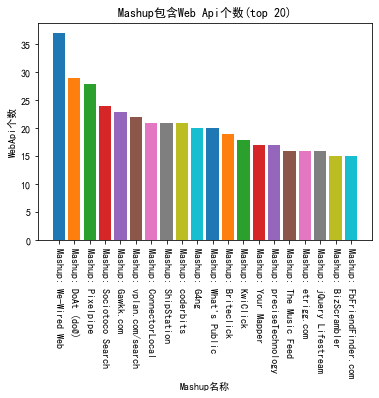

In [3]:
group_by = data1.groupby('source')

count_MashupApi = []
for key,values in group_by:
    count_MashupApi.append([key,len(values.values)])

count_MashupApi.sort(key=lambda x:x[1],reverse=True)

# 写入csv
out = open("./problem1/每个Mashup包含WebApi个数.csv", "w", encoding='utf-8-sig', newline='')
write = csv.writer(out,delimiter=',')
write.writerow(["Mashup名称","包含WebApi个数"])
for i,item in enumerate(count_MashupApi):
    if i<20:
        plt.bar(item[0],item[1])
    write.writerow([item[0],item[1]])
out.close()
f = pd.read_csv("./problem1/每个Mashup包含WebApi个数.csv", delimiter="\t")
print(f)

# 画统计图
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
plt.title("Mashup包含Web Api个数(top 20)")
plt.xlabel("Mashup名称")
plt.ylabel("WebApi个数")
plt.xticks(rotation=-90)
plt.savefig("./problem1/每个Mashup包含WebApi个数.png",bbox_inches='tight')
plt.show()
plt.close()

#### 1.2 统计每个Web API被使用的次数

                                   url,WebApi使用次数
0                           /api/google-maps,1984
1                                /api/twitter,671
2                                /api/youtube,562
3                                 /api/flickr,474
4                               /api/facebook,381
...                                           ...
1503                         /api/revel-systems,1
1504                     /api/lightspeed-retail,1
1505  /api/microsoft-cognitive-services-emotion,1
1506                                 /api/tixik,1
1507                           /api/topicalizer,1

[1508 rows x 1 columns]


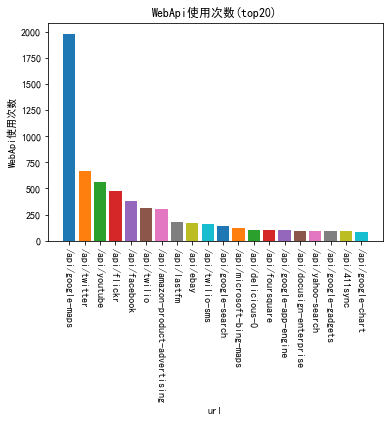

In [4]:
target = data1['target'].value_counts()
count_WebApiUse = list(target.items())

count_WebApiUse.sort(key=lambda x:x[1],reverse=True)

# 写入csv
out = open("./problem1/WebApi使用次数.csv", "w", encoding='utf-8-sig', newline='')
write = csv.writer(out,delimiter=',')
write.writerow(["url","WebApi使用次数"])
for i,item in enumerate(count_WebApiUse):
    if i<20:
        plt.bar(item[0],item[1])
    write.writerow([item[0],item[1]])
out.close()
f = pd.read_csv("./problem1/WebApi使用次数.csv", delimiter="\t")
print(f)

# 画统计图
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
plt.title("WebApi使用次数(top20)")
plt.xlabel("url")
plt.ylabel("WebApi使用次数")
plt.xticks(rotation=-90)
plt.savefig("./problem1/WebApi使用次数.png",bbox_inches='tight')
plt.show()
plt.close()

#### 1.3 统计Web API提供商（URL网址）发布Web API的个数

                 Web API提供商,次数
0            twitter.com,11268
1              github.com,1005
2               google.com,687
3      programmableweb.com,293
4        stackoverflow.com,221
...                        ...
15817          cloudyrec.com,1
15818          seattle20.com,1
15819           geekwire.com,1
15820        transloadit.com,1
15821             lymbix.com,1

[15822 rows x 1 columns]


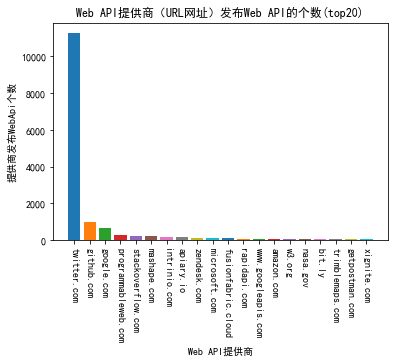

In [5]:
Dic = dict()
def solve(path):
    with open(path,"r") as f:
        li = json.load(f)
        for dic in li:
            from_api = dic["from_api"]
            url = from_api["url"]
            visit_status = dic["visit_status"]
            for visit_statu in visit_status:
                visit_url = str(visit_statu['visit_url'])
                visit_url = visit_url.strip()
                try:
                    result = get_tld(visit_url, as_object=True,fix_protocol=True).fld
                    if result in Dic:
                        Dic[result].add(url)
                    else:
                        Dic[result]=set()
                        Dic[result].add(url)
                except Exception as e:
                    pass
for root, dirs, files in os.walk("./data/raw/accessibility/api_accessibility"):
    for file in files:
        solve(os.path.join(root, file))
dic = {}
for it in Dic:
    dic[it]=len(Dic[it])
count_UrlProvideApi = list(dic.items())

count_UrlProvideApi.sort(key=lambda x:x[1],reverse=True)

# 写入csv文件
with open("./problem1/Web API提供商（URL网址）发布Web API的个数.csv", "w", encoding='utf-8-sig', newline='') as out:
    write = csv.writer(out, delimiter=",")
    write.writerow(["Web API提供商", "次数"])
    for i, it in enumerate(count_UrlProvideApi):
        if i<20:
            plt.bar(it[0],it[1])
        write.writerow([it[0], it[1]])
out.close()
f = pd.read_csv("./problem1/Web API提供商（URL网址）发布Web API的个数.csv", delimiter="\t")
print(f)

# 画统计图
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
plt.title("Web API提供商（URL网址）发布Web API的个数(top20)")
plt.xlabel("Web API提供商")
plt.ylabel("提供商发布WebApi个数")
plt.xticks(rotation=-90)
plt.savefig("./problem1/Web API提供商（URL网址）发布Web API的个数.png",bbox_inches='tight')
plt.show()
plt.close()

## 第二题

In [6]:
# 第二题自己处理出Mashup和Web Api对应的csv文件，并读取Mashup_nodes_estimator.csv文件
out = open("./problem2/MashupAndWebApi.csv", "w", encoding='utf-8-sig', newline='')
write = csv.writer(out,delimiter=',')
write.writerow(["category", "title","url"])

data2 = pd.read_csv("data/Mashup_nodes_estimator.csv", delimiter="\t")
group_by = data2.groupby('c')
for key, df in group_by:
    dic = {}
    for name in df['name']:
        for it in data1[data1['source'] == name]['target'].values:
            write.writerow([key,name, it])
out.close()

['3D', 108.77777777777777, 140.2325689567918, False, 0.7595623997054235]
['API', 26.0, 33.19624428862818, False, 0.3531649328512703]
['API Management', 0.0, nan, False, 1.0]
['Accessibility', 0.0, nan, False, 1.0]
['Accounting', 93.99999999999997, 107.56500853939279, False, 0.36565925022193935]
['Accounts', 0.0, nan, False, 1.0]
['Activity Streams', 0.0, nan, False, 1.0]
['Addresses', 0.0, 2.705543454095404, False, 1.0]
['Adult', 8.0, 10.644640675668422, False, 0.23810330555354436]
['Advertising', 126.58333333333331, 172.58121013624827, False, 0.9178086996747278]
['African', 0.0, nan, False, 1.0]
['Aggregation', 411.85311355311353, 495.104957378465, False, 0.9318380883043561]
['Air Travel', 187.06666666666672, 236.65493149913087, False, 0.8707057169180205]
['Algorithms', 0.0, 2.705543454095404, False, 1.0]
['Analytics', 833.8571428571429, 934.174149533313, False, 0.8651512112804953]
['Animals', 133.4888888888889, 154.28281397245826, False, 0.4717716161087487]
['Application Development'

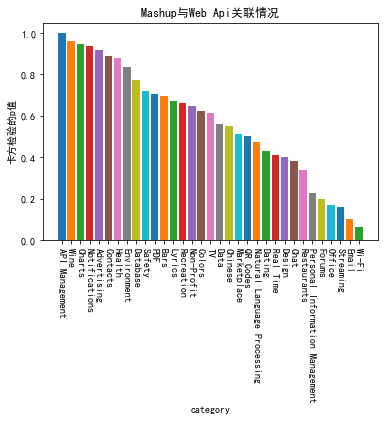

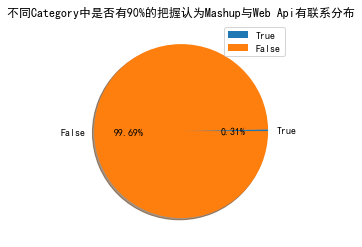

In [7]:
MashupAndApi_df = pd.read_csv("./problem2/MashupAndWebApi.csv", delimiter=",")
group_by_category = MashupAndApi_df.groupby('category')
columns = set()
indexes = set()
df = pd.DataFrame(data=None)
p_values = []

# 卡方检验
chi_square = open("./problem2/chi_square.csv", "w", encoding='utf-8-sig', newline='')
write = csv.writer(chi_square)
num1 = 0
num2 = 0
# 置信度:取90% 80% 70%
CF = 0.90
write.writerow(["category","卡方检验统计量", r"p-value","自由度","{:.0%}置信度下是否关联".format(CF)])
for key,value in group_by_category:
    columns = set()
    indexes = set()
    df = pd.DataFrame(data=None)
    for item in value.values:
        columns.add(item[1])
        indexes.add(item[2])
    chi_square_df = pd.DataFrame(data=0,columns=list(indexes),index=list(columns))
    for item in value.values:
        chi_square_df.loc[item[1], item[2]]+=1
    # 卡方检验的 卡方值,p值,自由度,预期频率
    chi2,p,free,exp = chi2_contingency(chi_square_df)
    p_values.append([key,p])
    # 置信度CF时的卡方分位数
    quantile = stats.chi2.ppf(q=CF,df=free)

    # 若卡方值大于分位数，则大于CF的概率二者相关;而1-p值是相关的具体概率,p值越小相关性越高
    # if chi2 >= quantile:
    if p < 1-CF:
        num1 += 1
        print([key,chi2,quantile,True,p])
        write.writerow([key,str(chi2),str(p),str(free),True])
    else:
        num2 += 1
        print([key,chi2,quantile,False,p])
        write.writerow([key,str(chi2),str(p),str(free),False])

    chi_square_df.to_csv("./problem2/chi square/"+key+".csv")
chi_square.close()

p_values.sort(key=lambda x:x[1],reverse=True)
for i,item in enumerate(p_values):
    if i==0:
        plt.bar(item[0],item[1])
    elif p_values[i-1][1]-p_values[i][1]>0.01:
            plt.bar(item[0],item[1])

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
plt.title("Mashup与Web Api关联情况")
plt.xlabel("category")
plt.ylabel("卡方检验的p值")
plt.xticks(rotation=-90)
plt.savefig("./problem2/Mashup与WebApi关联情况.png",bbox_inches='tight')
plt.show()
plt.close()

# 扇形图体现不同Category中有无联系的比例（置信度CF）
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
labels = ["True", "False"]
x = [num1, num2]
explode = [0, 0]
title="不同Category中是否有{:.0%}的把握认为Mashup与Web Api有联系分布".format(CF)
plt.pie(x=x, labels=labels, explode=explode, shadow=True, autopct="%0.2f%%")
plt.legend()
plt.title(title)
plt.savefig("./problem2/扇形图-{:.0%}置信度下关联情况判断.png".format(CF),bbox_inches='tight')
plt.show()
plt.close()

## 第三题

In [8]:
# 第三题处理数据得到Web Api之间的兼容情况
link = {}
def getEdge(path):
    with open(path,"r") as f:
        data = json.load(f)
        for dic in data:
            if dic==None:
                continue
            relation = dic['related_apis']
            l = len(relation)
            for i in range(l):
                if relation[i]==None:
                    continue
                url1 = relation[i]['url']
                if url1 not in link.keys():
                    link[url1] = {}
                for j in range(i+1,l):
                    if relation[j]==None:
                        continue
                    url2 = relation[j]['url']
                    if url2 not in link[url1].keys():
                        link[url1][url2] = 0
                    link[url1][url2] += 1
                    if url2 not in link.keys():
                        link[url2] = {}
                    if url1 not in link[url2].keys():
                        link[url2][url1] = 0
                    link[url2][url1] += 1
getEdge("./data/raw/api_mashup/active_mashups_data.txt")
getEdge("./data/raw/api_mashup/deadpool_mashups_data.txt")
print(link)

{'/api/yelp-fusion': {'/api/rotten-tomatoes': 1, '/api/unofficial-imdb': 1, '/api/cnet': 2, '/api/google-maps': 39, '/api/google-custom-search': 2, '/api/foursquare': 13, '/api/easytobook': 1, '/api/google-analytics-managment': 1, '/api/google-adsense': 3, '/api/mapbox': 1, '/api/amazon-s3': 2, '/api/elasticsearch': 2, '/api/world-weather-online': 1, '/api/flickr': 15, '/api/twitter': 16, '/api/facebook': 15, '/api/alchemyapi': 2, '/api/google-maps-places': 3, '/api/facebook-ads': 1, '/api/zillow': 3, '/api/walk-score': 5, '/api/geocoder': 1, '/api/trulia': 1, '/api/factual-v3': 1, '/api/socrata-open-data': 1, '/api/ordrx': 1, '/api/expedia': 1, '/api/sensis-business-search': 1, '/api/scribd-platform': 1, '/api/yahoo-maps': 1, '/api/yahoo-geocoding': 4, '/api/google-cloud-translation': 3, '/api/google-translator-toolkit': 2, '/api/yahoo-local-search': 8, '/api/citygrid': 5, '/api/google-geocoding': 1, '/api/yipit': 1, '/api/twilio': 3, '/api/quova': 1, '/api/groupon': 2, '/api/8coupons

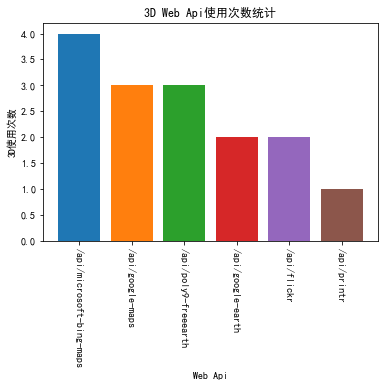

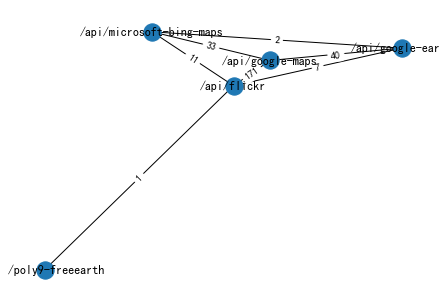

In [9]:
# 展示柱状图和关联图各一个到输出台上
show_bar = False
show_graph = False

for key,value in group_by_category:
    num = {}
    for item in value.values:
        if item[2] not in num.keys():
            num[item[2]] = 0
        num[item[2]] += 1
    li = list(num.items())
    li.sort(key=lambda x:x[1],reverse=True)
    li = li[:min(len(li),6)]

    # 对各个Category中Web Api的使用次数进行统计并做统计图
    plt.rcParams["font.sans-serif"] = ["SimHei"]
    plt.rcParams["axes.unicode_minus"] = False
    for item in li:
        plt.bar(item[0],item[1])
    plt.title(key+" Web Api使用次数统计")
    plt.xlabel("Web Api")
    plt.ylabel(key+"使用次数")
    plt.xticks(rotation=-90)
    plt.savefig("./problem3/Web Api使用次数统计/"+key+" Web Api使用次数统计.png",bbox_inches='tight')
    if show_bar == False:
        plt.show()
        show_bar = True
    plt.close()

    # 使用networkx包对各个Category兼容情况进行构图,以Web Api为结点,协作次数为边
    G = nx.Graph()
    n = len(li)
    for i in range(n):
        for j in range(i+1,n):
            u = li[i][0]
            v = li[j][0]
            if u in link.keys() and v in link[u].keys():
                G.add_edge(u, v, weight=link[u][v])
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_weight='bold')
    plt.savefig("./problem3/Web Api兼容情况/"+key+" Web Api兼容情况图",bbox_inches='tight')
    if show_graph == False:
        plt.show()
        show_graph = True
    plt.close()